The requests library is the de facto standard for making HTTP requests in Python. It abstracts the complexities of making requests behind a beautiful, simple API so that you can focus on interacting with services and consuming data in your application.

In this tutorial, you’ll learn how to:

    Make requests using the most common HTTP methods
    Customize your requests’ headers and data, using the query string and message body
    Inspect data from your requests and responses
    Make authenticated requests
    Configure your requests to help prevent your application from backing up or slowing down


## Installing requests module

Let’s begin by installing the requests library. To do so, run the following command:

Once requests is installed, you can use it in your application. Importing requests looks like this:

Now that you’re all set up, it’s time to begin your journey through requests. Your first goal will be learning how to make a GET request.

## The GET Request

The GET method indicates that you’re trying to get or retrieve data from a specified resource. To make a GET request, invoke requests.get():

In [10]:
import requests
requests.get("https://api.github.com")

<Response [200]>

Congratulations! You’ve made your first request. Let’s dive a little deeper into the response of that request.

## The Response Object

A Response is a powerful object for inspecting the results of the request. Let’s make that same request again, but this time store the return value in a variable so that you can get a closer look at its attributes and behaviors:

In [11]:
import requests
response = requests.get("https://api.github.com")

In this example, you’ve captured the return value of get(), which is an instance of Response, and stored it in a variable called response. You can now use response to see a lot of information about the results of your GET request:

### The Status Code in the Response

The first bit of information that you can gather from Response is the status code. A status code informs you of the status of the request.

For example, a 200 OK status means that your request was successful, whereas a 404 NOT FOUND status means that the resource you were looking for was not found. There are many other possible status codes [3] as well to give you specific insights into what happened with your request.

By accessing .status_code, you can see the status code that the server returned:

In [12]:
response.status_code

200

.status_code returned a 200, which means your request was successful and the server responded with the data you were requesting.

Sometimes, you might want to use this information to make decisions in your code. For ex:

In [ ]:
if response.status_code == 200:
    print('Success!')
elif response.status_code == 404:
    print('Not Found.')

requests goes one step further in simplifying this process for you. If you use a Response instance in a conditional expression, it will evaluate to True if the status code was between 200 and 400, and False otherwise.

In [ ]:
if response: # status code is between 200 and 400
    print('Success!')
else:
    print('An error has occurred.')

Keep in mind that this method is not verifying that the status code is equal to 200. The reason for this is that other status codes within the 200 to 400 range, such as **204 NO CONTENT** and **304 NOT MODIFIED**, are also considered successful in the sense that they provide some workable response.

So, make sure you use this convenient shorthand only if you want to know if the request was generally successful and then, if necessary, handle the response appropriately based on the status code.

Let’s say you don’t want to check the response’s status code in an if statement. Instead, you want to raise an exception if the request was unsuccessful (a 4XX client error or 5XX server error response). You can do this using **Response.raise_for_status()**:

In [1]:
import requests
from requests.exceptions import HTTPError

for url in ['https://api.github.com', 'https://api.github.com/invalid']:
    try:
        response = requests.get(url)
        # If the response was successful, no Exception will be raised
        response.raise_for_status()
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')  # Python 3.6
    except Exception as err:
        print(f'Other error occurred: {err}')      # Python 3.6
    else:
        print('Success!')

Success!
HTTP error occurred: 404 Client Error: Not Found for url: https://api.github.com/invalid


If you invoke **.raise_for_status()**, an **HTTPError** will be raised for **4XX** and **5XX** codes. If the status code indicates a successful request, the program will proceed without that exception being raised.

Now, you know a lot about how to deal with the status code of the response you got back from the server. However, when you make a GET request, you rarely only care about the status code of the response. Usually, you want to see more. Next, you’ll see how to view the actual data that the server sent back in the body of the response.

## Response Content

The response of a GET request often has some valuable information, known as a **payload**, in the message body. Using the attributes and methods of **Response**, you can view the payload in a variety of different formats.

To see the response’s content in bytes, you use **Response.content**:

In [13]:
response = requests.get('https://api.github.com')
response.content  # gives the message body in b{string} in raw bytes

b'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","label_sea

(???) While **Response.content** gives you access to **the raw bytes of the response payload**, you will often want to convert them into a string using a character encoding such as **UTF-8**. response will do that for you when you access **Response.text**:

In [14]:
response.text

'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","label_sear

(???) Because the decoding of bytes to a str requires an encoding scheme, requests will try to guess the encoding based on the response’s headers if you do not specify one. You can provide an explicit encoding by setting **Response.encoding** before accessing .text:

In [15]:
response.encoding = 'utf-8' # Optional: requests infers this internally by looking at response headers
response.text

'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","label_sear

If you take a look at the response, you’ll see that it is actually serialized **JSON** content. To get a dictionary, you could take the str you retrieved from .text and deserialize it using **json.loads()**. However, a simpler way to accomplish this task is to use **Response.json()**:

In [16]:
response.json()  # return value is a dictionary

{'current_user_url': 'https://api.github.com/user',
 'current_user_authorizations_html_url': 'https://github.com/settings/connections/applications{/client_id}',
 'authorizations_url': 'https://api.github.com/authorizations',
 'code_search_url': 'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}',
 'commit_search_url': 'https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}',
 'emails_url': 'https://api.github.com/user/emails',
 'emojis_url': 'https://api.github.com/emojis',
 'events_url': 'https://api.github.com/events',
 'feeds_url': 'https://api.github.com/feeds',
 'followers_url': 'https://api.github.com/user/followers',
 'following_url': 'https://api.github.com/user/following{/target}',
 'gists_url': 'https://api.github.com/gists{/gist_id}',
 'hub_url': 'https://api.github.com/hub',
 'issue_search_url': 'https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}',
 'issues_url': 'https://api.github.com/issues',
 'keys_url': '

The type of the return value of .json() is a dictionary, so you can access values in the object by key.

In case the JSON decoding fails, **response.json()** raises an exception. For example, if the response gets a 204 (No Content), or if the response contains invalid JSON, attempting r.json() raises ValueError: No JSON object could be decoded.

It should be noted that the success of the call to **response.json(**) does not indicate the success of the response. Some servers may return a JSON object in a failed response (e.g. error details with HTTP 500). Such JSON will be decoded and returned. To check that a request is successful, use **raise.raise_for_status()** or check **response.status_code** is what you expect.

You can do a lot with status codes and message bodies. But, if you need more information, like metadata about the response itself, you’ll need to look at the response’s headers.

## Response Headers

The response headers can give you useful information, such as the content type of the response payload and a time limit on how long to cache the response. To view these headers, access **Response.headers**:

In [17]:
response.headers

{'Date': 'Wed, 20 Nov 2019 10:17:30 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Server': 'GitHub.com', 'Status': '200 OK', 'X-RateLimit-Limit': '60', 'X-RateLimit-Remaining': '57', 'X-RateLimit-Reset': '1574248650', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept, Accept-Encoding', 'ETag': 'W/"307bf49b7e1b8e6fe4ef622d609665e1"', 'X-GitHub-Media-Type': 'github.v3; format=json', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'Referrer-Policy': 'origin-when-cross-origin, strict-origin-when-cross-origin', 'Content-Security-Policy': "default-

**Response.headers** returns a dictionary-like object, allowing you to access header values by key. For example, to see the content type of the response payload, you can access **Content-Type**:

In [18]:
response.headers['Content-Type']

'application/json; charset=utf-8'

Now, you’ve learned the basics about **Response**. You’ve seen its most useful attributes and methods in action. Let’s take a step back and see how your responses change when you customize your **GET** requests.

## GET Request : Query String Parameters

One common way to customize a GET request is to pass values through query string parameters in the URL. To do this using Request.get(url, params), you pass data to **params** to **requests.get()** method. For example, you can use GitHub’s Search API to look for the requests library:

In [25]:
import requests

# Search GitHub's repositories for requests
response = requests.get(
    'https://api.github.com/search/repositories',
    params={'q': 'requests+language:python'},
)

print(response.json())
# Inspect some attributes of the `requests` repository
json_response = response.json() # a dict
first_repository = json_response['items'][0]  # items is a list of dicts. Each dict is a repository
print(f'Repository name: {first_repository["name"]}')  
print(f'Repository description: {first_repository["description"]}')

{'total_count': 8685, 'incomplete_results': False, 'items': [{'id': 4290214, 'node_id': 'MDEwOlJlcG9zaXRvcnk0MjkwMjE0', 'name': 'grequests', 'full_name': 'spyoungtech/grequests', 'private': False, 'owner': {'login': 'spyoungtech', 'id': 15212758, 'node_id': 'MDQ6VXNlcjE1MjEyNzU4', 'avatar_url': 'https://avatars2.githubusercontent.com/u/15212758?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/spyoungtech', 'html_url': 'https://github.com/spyoungtech', 'followers_url': 'https://api.github.com/users/spyoungtech/followers', 'following_url': 'https://api.github.com/users/spyoungtech/following{/other_user}', 'gists_url': 'https://api.github.com/users/spyoungtech/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/spyoungtech/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/spyoungtech/subscriptions', 'organizations_url': 'https://api.github.com/users/spyoungtech/orgs', 'repos_url': 'https://api.github.com/users/spyoungtech/repos', 'events_u

By passing the dictionary **{'q': 'requests+language:python'}** to the **params** parameter of **requests.get()**, you are able to modify the results that come back from the Search API.

Note that query string appears to be in the HTTP requests URI. To prove this:

In [ ]:
import requests
response = requests.get('http://httpbin.org/get', params={'q': 'requests+language:python'})

The resulting request is:

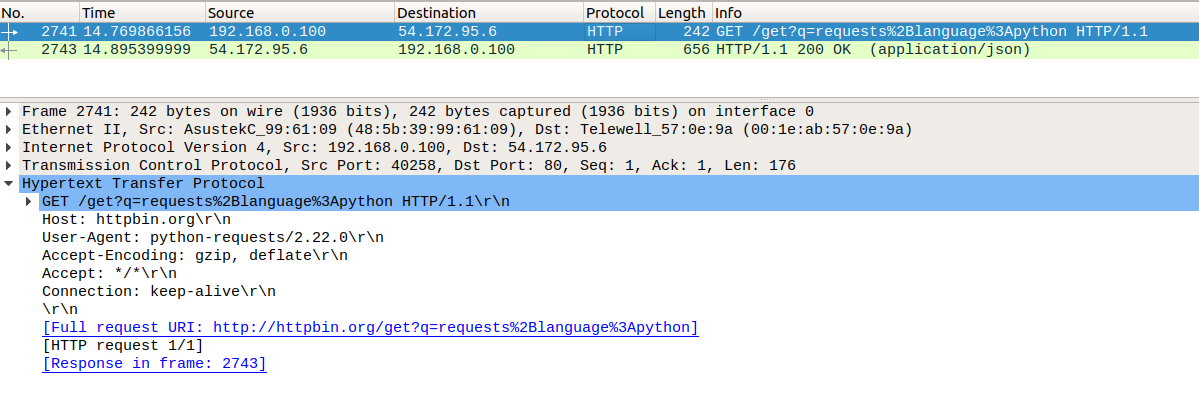

where the request URI is **/get?q=requests%2Blanguage%3Apython**

Query strings are useful for parameterizing GET requests. You can also customize your requests by adding or modifying the headers you send.

**Get Request : Request Headers**

To customize headers, you pass a dictionary of HTTP headers to **requests.get(url, params, headers)** using the **headers** parameter. For example, you can change your previous search request to highlight matching search terms in the results by specifying the text-match media type in the **Accept** header:

In [27]:
import requests

response = requests.get(
    'https://api.github.com/search/repositories',
    params={'q': 'requests+language:python'},
    headers={'Accept': 'application/vnd.github.v3.text-match+json'},
)

# View the new `text-matches` array which provides information
# about your search term within the results
json_response = response.json()  # a dict
repository = json_response['items'][0]  # Get the first repository dictionary from items array
print(f'Text matches: {repository["text_matches"]}')

Text matches: [{'object_url': 'https://api.github.com/repositories/4290214', 'object_type': 'Repository', 'property': 'description', 'fragment': 'Requests + Gevent = <3', 'matches': [{'text': 'Requests', 'indices': [0, 8]}]}]


The Accept header tells the server what content types your application can handle. In this case, since you’re expecting the matching search terms to be highlighted, you’re using the header value **application/vnd.github.v3.text-match+json**, which is a proprietary GitHub Accept header where the content is a special JSON format.

Before you learn more ways to customize the GET requests, let’s broaden the horizon by exploring other HTTP methods.

## Calling other HTTP methods via request module

### requests.post(url, data) sending form encoded data as a resource

In [28]:
response = requests.post('http://httpbin.org/post', data={'key':'value'})

**POST** – submitting a resource to a server (e.g. file uploads)

According to the HTTP specification, **POST request passes its data through the message body** rather than through parameters in the query string. Using requests, you’ll pass the payload to request.post()'s **data** parameter.

In requests.post(url, **data**) call, **data** takes a dictionary, a list of tuples, bytes, or a file-like object. You’ll want to adapt the data you send in the body of your request to the specific needs of the service you’re interacting with.

Below given the corresponding HTTP Request message:

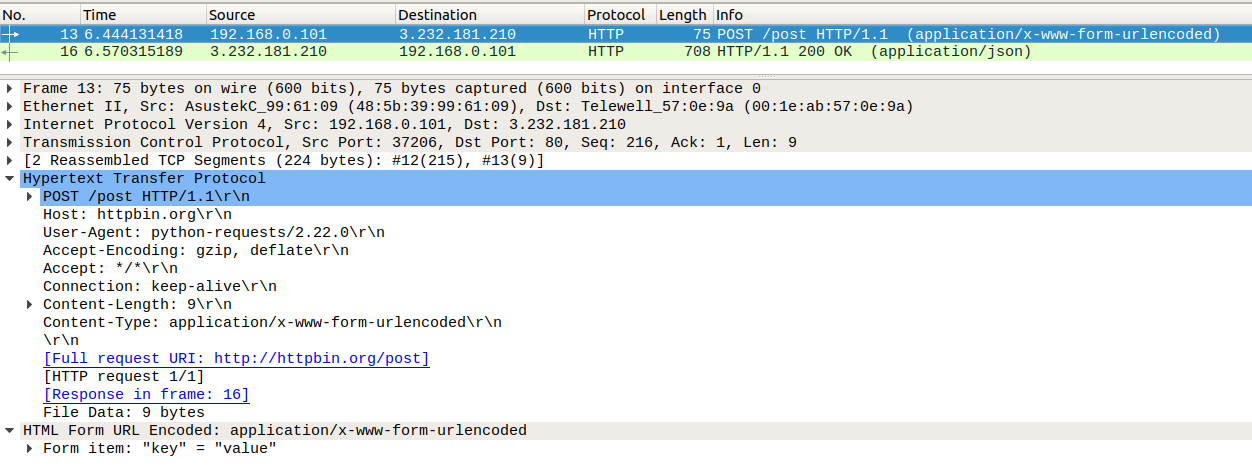

(???) The **Content-Type** entity header is used to indicate the media type of the resource (i.e. the payload).
In the above POST request, the client tells the server what type of data is actually sent.Your request’s content type is **application/x-www-form-urlencoded**, you can send the form data as a dictionary

and the corresponding HTTP response message is:

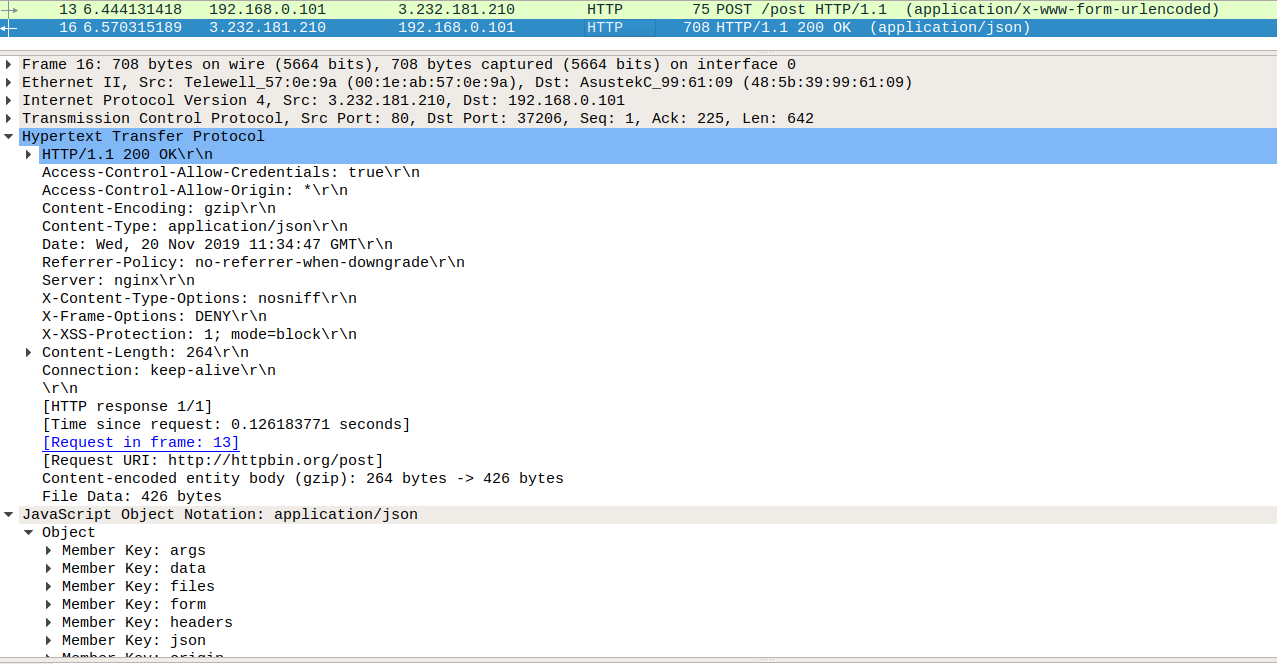

### requests.post(url, json) sending JSON as a resource

If, however, you need to send **JSON** data, you can use the **json parameter** (i.e. requests.post(url, json). When you pass JSON data via json parameter, requests will serialize your data and add the correct **Content-Type** header for you. Lets see an example:

In [29]:
response = requests.post('http://httpbin.org/post', json={"key": "value"})

the json parameter is ignored if either **data** or **files** is passed.

Using the json parameter in the request will change the **Content-Type** in the header to **application/json**.

which results in the following HTTP POST request. Note the Content-Type header.

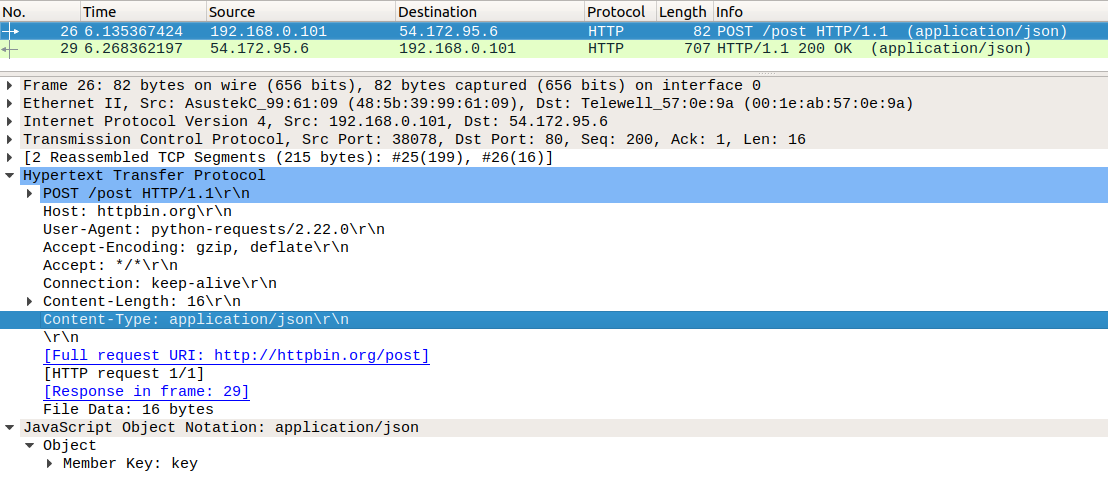

we can analyze the response as follows:

In [30]:
json_response = response.json()
print(json_response)

{'args': {}, 'data': '{"key": "value"}', 'files': {}, 'form': {}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Content-Length': '16', 'Content-Type': 'application/json', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.22.0'}, 'json': {'key': 'value'}, 'origin': '80.221.51.156, 80.221.51.156', 'url': 'https://httpbin.org/post'}


Referring to the json_response for the POST request, the server added all the request headers to json_response.headers. Also, the server added the JSON data we passed in the request (i.e. json={"key": "value"})
to json_response.data.

In [31]:
json_response['data']

'{"key": "value"}'

In [32]:
json_response['headers']['Content-Type']

'application/json'

## Other HTTP methods

In [ ]:
requests.head('http://httpbin.org/get')

HEAD – As GET but only return headers and not the content. A client can use the HEAD request to get the response headers that a GET request would have obtained. Since the headers contains the last-modified date of the data, this can be used to check against the local cache copy.

In [ ]:
requests.put('http://httpbin.org/put', data={'key':'value'})

POST – submitting a resource to a server (e.g. file uploads)

PUT -As POST but replaces an existing resource

In [ ]:
requests.delete('http://httpbin.org/delete')

DELETE-Delete a resource from a server

In [ ]:
requests.patch('http://httpbin.org/patch', data={'key':'value'})

PATCH -Apply modifications to a resource

### request.options() call

In [35]:
response = requests.options('http://httpbin.org/get')

OPTIONS -To find out which request types a server supports, one can use curl and issue an OPTIONS request

The corresponding HTTP request is:

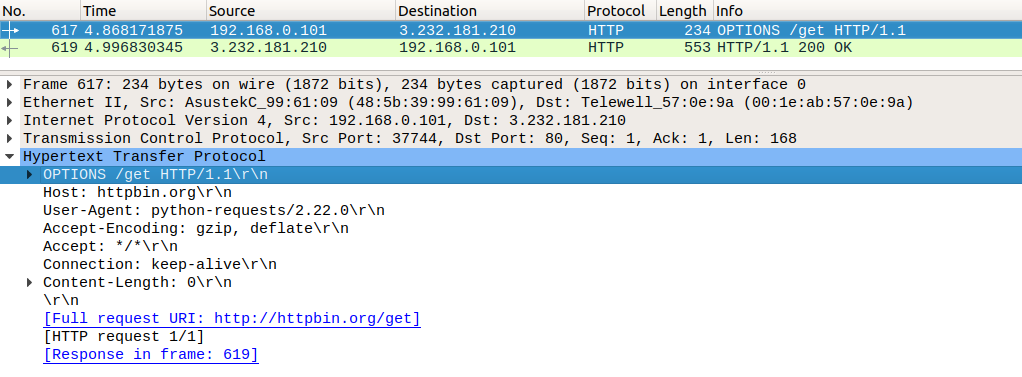

the corresponding response is (note the response header **Access-Control-Allow-Methods**):

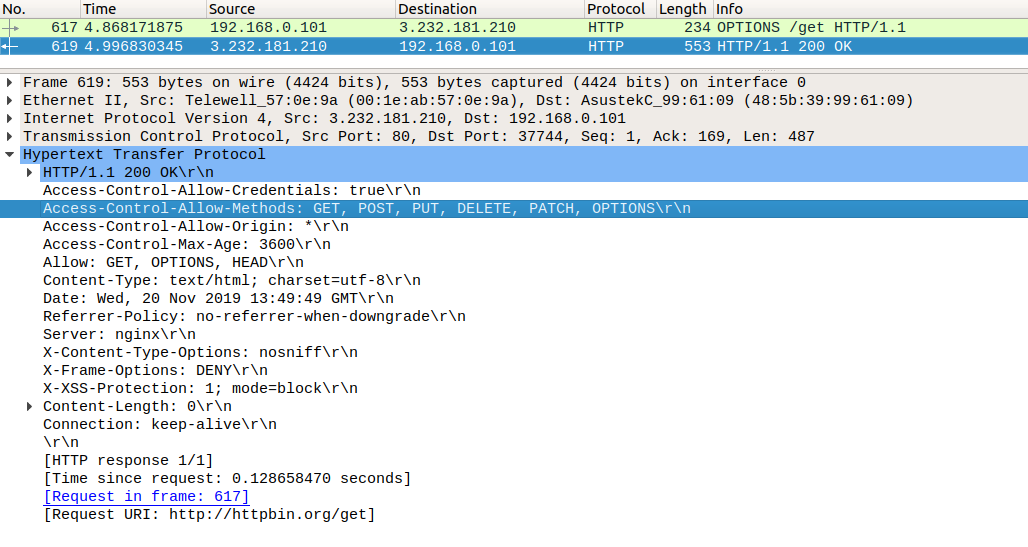

which note that **Access-Control-Allow-Methods** can be verified from the **response.headers** as follows:

In [37]:
response.headers['Access-Control-Allow-Methods']

'GET, POST, PUT, DELETE, PATCH, OPTIONS'

# Inspecting Your Request

When you make a request, the requests library prepares the request before actually sending it to the destination server. Request preparation includes things like creating the request headers and serializing JSON content.

You can view the **PreparedRequest** by accessing response.request:

In [39]:
response = requests.post('https://httpbin.org/post', json={'key':'value'})
response.request.headers['Content-Type']

'application/json'

In [40]:
response.request.url

'https://httpbin.org/post'

In [41]:
response.request.body  # payload

b'{"key": "value"}'

Inspecting the PreparedRequest gives you access to all kinds of information about the request being made such as payload, URL, headers, authentication, and more.

So far, you’ve made a lot of different kinds of requests, but they’ve all had one thing in common: **they’re unauthenticated requests to public APIs**. Many services you may come across will want you to authenticate in some way.

# Authentication

Authentication helps a service understand who you are. Typically, you provide your credentials to a server by passing data through the **Authorization** header or a custom header defined by the service. **All the request functions you’ve seen to this point provide a parameter** called **auth**, which allows you to pass your credentials.

In [43]:
import requests
response = requests.get("http://httpbin.org/basic-auth/username/password", auth=('username', 'password'))

Note that in the URI we have "username/password" relative path, which is required by the server to return 200 OK message.

The corresponding request is:

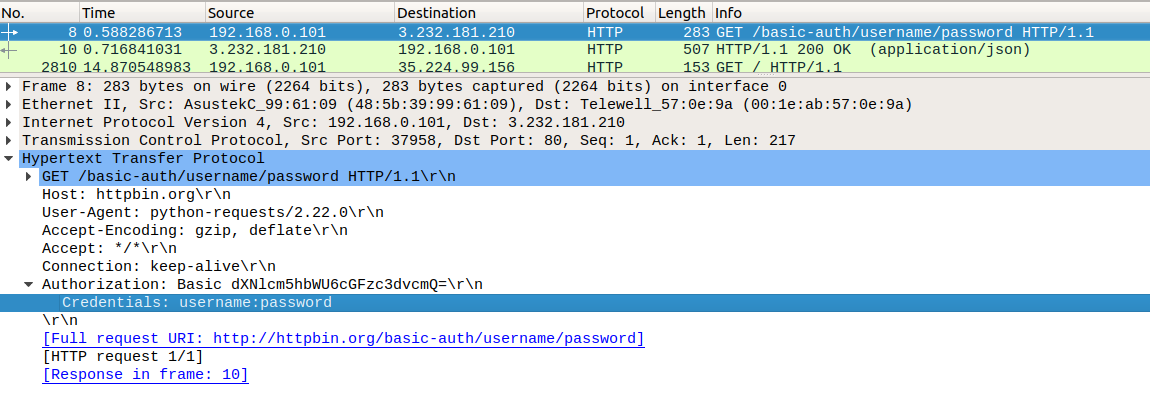

Note that when you pass your credentials, they end up in the request **Authorization** header

**NOTE**: When you pass your username and password in a tuple to the auth parameter, requests module is applying the credentials using HTTP’s **Basic access authentication scheme** under the hood [4].

How can we get 401 Unauthorized response from httpbin server? By modifying the URI of the request as such:

In [45]:
import requests
response = requests.get("http://httpbin.org/basic-auth/not/valid", auth=('username', 'password'))

which gives us a **401 Unauthorized** response:

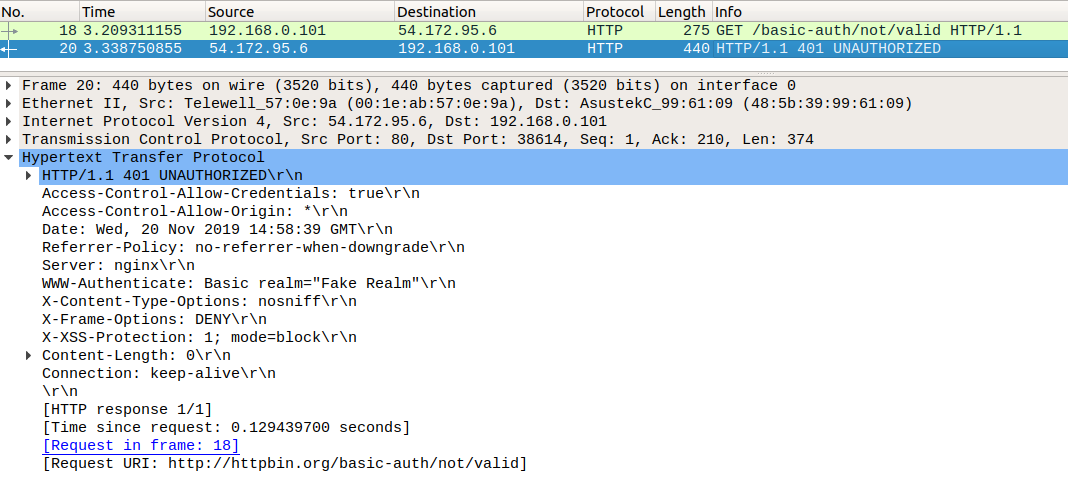

**NOTE** When you pass your username and password in a tuple to the **auth** parameter in your request, requests module is applying the credentials using HTTP’s Basic access authentication scheme under the hood.

Therefore, you could make the same request by passing explicit Basic authentication credentials using **HTTPBasicAuth**:

In [46]:
from requests.auth import HTTPBasicAuth
import requests
response = requests.get("http://httpbin.org/basic-auth/username/password", 
                        auth = HTTPBasicAuth('username', 'password'))
response.status_code

200

**Note**: You may want to authenticate using another method. requests provides other methods of authentication out of the box such as **HTTPDigestAuth** and **HTTPProxyAuth**.

Here is an example of **HTTPDigestAuth** call:

In [51]:
from requests.auth import HTTPDigestAuth
import requests
response = requests.get("http://httpbin.org/digest-auth/auth/username/password", 
                        auth = HTTPDigestAuth('username', 'password'))
response.status_code

200

(???) Here is an example of **HTTPProxyAuth** call:

**NOTE**: You can even supply your own authentication mechanism. For that refer to https://realpython.com/python-requests/#authentication

**NOTE:** Bad authentication mechanisms can lead to security vulnerabilities, so unless a service requires a custom authentication mechanism for some reason, you’ll always want to use a tried-and-true auth scheme like Basic or **OAuth** (?).

# SSL Certificate Verification

Any time the data you are trying to send or receive is sensitive, security is important. The way that you communicate with secure sites over HTTP is by establishing an encrypted connection using SSL, which means that verifying the target server’s SSL Certificate is critical.

The good news is that requests does this for you by default. However, there are some cases where you might want to change this behavior.

If you want to disable SSL Certificate verification, you pass False to the verify parameter of the request function:

In [4]:
requests.get('https://api.github.com', verify=False)

/home/hakan/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Response [200]>

**NOTE**: Note: requests uses a package called **certifi** to provide Certificate Authorities. This lets requests know which authorities it can trust. Therefore, you should update certifi frequently to keep your connections as secure as possible.

# Using Request Module : Performance Considerations

When using requests, especially in a production application environment, it’s important to consider performance implications. Features like **timeout control**, **sessions**, and **retry limits** can help you keep your application running smoothly. 

Timeouts, Transport Adapters, and sessions are for keeping your code efficient and your application resilient.

## Timeouts

When you make an inline request to an external service, your system will need to wait upon the response before moving on. If your application waits too long for that response, requests to your service could back up, your user experience could suffer, or your background jobs could hang.

**By default, requests will wait indefinitely on the response, so you should almost always specify a timeout duration** to prevent these things from happening. To set the request’s timeout, use the **timeout** parameter. timeout can be an integer or float representing the number of seconds to wait on a response before timing out:

In [7]:
requests.get('https://api.github.com', timeout=1)

<Response [200]>

You can also pass a tuple to timeout with the first element being **a connect timeout** (the time it allows for the client to establish a connection to the server), and the second being **a read timeout** (the time it will wait on a response once your client has established a connection):

In [8]:
requests.get('https://api.github.com', timeout=(2, 5))

<Response [200]>

If the request establishes a connection within 2 seconds and receives data within 5 seconds of the connection being established, then the response will be returned as it was before. If the request times out, then the function will raise a **Timeout** exception:

In [9]:
import requests
from requests.exceptions import Timeout

try:
    response = requests.get('https://api.github.com', timeout=1)
except Timeout:
    print('The request timed out')
else:
    print('The request did not time out')

The request did not time out


Your program can catch the Timeout exception and respond accordingly.

## The Session Object

Until now, you’ve been dealing with high level requests APIs such as **get()** and **post()**. These functions are abstractions of what’s going on when you make your requests. They hide implementation details such as **how connections are managed** so that you don’t have to worry about them.

Underneath those abstractions is a class called **Session** (**i.e. return value of requests.Session()**). If you need to fine-tune your control over how requests are being made or improve the performance of your requests, you may need to use a Session instance directly.

**Sessions are used to persist parameters across requests**. For example, if you want to use the same authentication across multiple requests, you could use a session:

In [13]:
import requests

# By using a context manager, you can ensure the resources used by
# the session will be released after use
with requests.Session() as session:
    session.auth = ('username', 'password')
    # Instead of requests.get(), you'll use session.get()
    get_response = session.get('http://httpbin.org/get')
    # You can inspect the response just like you did before
    print(get_response.request.headers['Authorization'])
    
    post_response = session.post('https://httpbin.org/post', json={'key':'value'})
    # You can inspect the response just like you did before
    print(post_response.request.headers['Authorization'])


Basic dXNlcm5hbWU6cGFzc3dvcmQ=
Basic dXNlcm5hbWU6cGFzc3dvcmQ=


The above example proves that using the session object's get/post/etc methods, we use the same Authentication header. So, Each time you make a request with session, once it has been initialized with authentication credentials, the credentials will be persisted.

The primary performance optimization of sessions comes in the form of persistent connections. When your app makes a connection to a server using a Session, it keeps that connection around in a connection pool. When your app wants to connect to the same server again, it will reuse a connection from the pool rather than establishing a new one. (???) HTTP1.1 has request header **Connection: keep-alive**. Is it somehow related with the session object?

## Max Retries

When a request fails via:

    failed DNS lookups, 
    failed socket connections
    connection timeouts

Then you may want your application to retry the same request. However, requests will not do this for you by default. To apply this functionality, you need to implement a custom **Transport Adapter**.

**Transport Adapters let you define a set of configurations per service** you’re interacting with. For example, let’s say you want all requests to http://httpbinBADBAD.org/ to retry three times before finally raising a **ConnectionError**. You would build a **Transport Adapter**, set its **max_retries** parameter, and mount it to an existing **Session**:

In [2]:
import requests
from requests.adapters import HTTPAdapter
from requests.exceptions import ConnectionError

httpbin_adapter = HTTPAdapter(max_retries=3) # a set of configurations for httpbin service
with requests.Session() as session:
    
    # Use `httpbin_adapter` for all requests to endpoints that start with this URL
    session.mount('http://httpbin.org/', httpbin_adapter)
    try:
        bad_url_with_dns_error = 'http://httpbin.orgBADBAD/status/404'
        bad_timeout_value = 0.1 # in seconds
        session.get( bad_url_with_dns_error, timeout = bad_timeout_value, headers={'Accept':'text/plain'}) # timeout set intentionally too small to fail
    except ConnectionError as ce:
        print(ce)

HTTPConnectionPool(host='httpbin.orgbadbad', port=80): Max retries exceeded with url: /status/404 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fe2a5347c50>: Failed to establish a new connection: [Errno -2] Name or service not known'))


**NOTE**: HTTPAdapter(max_retries=3) never applies to requests where data has made it to the server. This means that if we get 4XX or 5XX errors from the server, from HTTPAdapter's perspective, this is a successful communication, so it wont raise ConnectionError [7]

## REFERENCES

[1] https://realpython.com/python-requests/

[2] https://www.w3schools.com/tags/ref_httpmethods.asp

[3] https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

[4] https://en.wikipedia.org/wiki/Basic_access_authentication

[5] http://docs.python-requests.org/en/master/user/advanced/#transport-adapters

[6] Request Library : HTTP Made for Humans
https://requests.kennethreitz.org/en/master/user/quickstart/

[7] https://2.python-requests.org/en/master/api/#requests.adapters.HTTPAdapter